In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,auc
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
!pip install xgboost
import xgboost as xgb


In [16]:
!pip install catboost
from catboost import CatBoostClassifier

In [17]:
df=pd.read_csv("/content/sample_data/bank-additional-full.csv",sep=';')

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
num_cols=(df.select_dtypes(["int64","float64"]))

In [21]:
num_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [22]:
num_cols.isnull().sum()

,0
age,0
duration,0
campaign,0
pdays,0
previous,0
emp.var.rate,0
cons.price.idx,0
cons.conf.idx,0
euribor3m,0
nr.employed,0


In [23]:
df["pdays"] = df["pdays"].apply(lambda x: 0 if x == 999 else 1)

In [24]:
df.previous = df.previous.apply(lambda x: 1 if x > 0 else 0)

In [25]:
num_cols.drop(["pdays","previous"],axis=1,inplace=True)

In [26]:

model = IsolationForest(contamination=0.08, random_state=42)
outliers = model.fit_predict(num_cols)


df['outlier'] = outliers

df_cleaned = df[df['outlier'] == 1].drop(columns=['outlier'])

print(f"Orijinal veri seti boyutu: {df.shape}")
print(f"Temizlenmiş veri seti boyutu: {df_cleaned.shape}")
print(df_cleaned.head())


Orijinal veri seti boyutu: (41176, 22)
Temizlenmiş veri seti boyutu: (37882, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1      0         0  nonexistent          1.1   
1   may         mon  ...         1      0         0  nonexistent          1.1   
2   may         mon  ...         1      0         0  nonexistent          1.1   
3   may         mon  ...         1      0         0  nonexistent          1.1   
4   may         mon  ...         1      0         0  none

In [27]:
df_cleaned.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37882 entries, 0 to 40551
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37882 non-null  int64  
 1   job             37882 non-null  object 
 2   marital         37882 non-null  object 
 3   education       37882 non-null  object 
 4   default         37882 non-null  object 
 5   housing         37882 non-null  object 
 6   loan            37882 non-null  object 
 7   contact         37882 non-null  object 
 8   month           37882 non-null  object 
 9   day_of_week     37882 non-null  object 
 10  duration        37882 non-null  int64  
 11  campaign        37882 non-null  int64  
 12  pdays           37882 non-null  int64  
 13  previous        37882 non-null  int64  
 14  poutcome        37882 non-null  object 
 15  emp.var.rate    37882 non-null  float64
 16  cons.price.idx  37882 non-null  float64
 17  cons.conf.idx   37882 non-null  floa

In [29]:
num_cols_cleaned=df_cleaned.select_dtypes(["int64","float64"])

In [30]:
df_cleaned['euribor3m*emp.var.rate*nr.employed']=df_cleaned["euribor3m"]*df_cleaned["emp.var.rate"]*df_cleaned["nr.employed"]

In [31]:
df_cleaned.drop(["euribor3m","nr.employed","emp.var.rate"],inplace=True,axis=1)

In [32]:
df_cleaned.drop(df_cleaned[(df_cleaned["duration"]==0)].index,inplace=True)

In [33]:
df_cleaned[["job","marital","loan","default","housing","education"]]=df_cleaned[["job","marital","loan","default","housing","education"]].replace("unknown",np.NaN)

In [34]:


categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col].astype(str))


imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
df_clean_imputed = imputer.fit_transform(df_cleaned)

df_clean_imputed = pd.DataFrame(df_clean_imputed, columns=df_cleaned.columns)
print(df_clean_imputed.head())



    age  job  marital  education  default  housing  loan  contact  month  \
0  56.0  3.0      1.0        0.0      1.0      1.0   1.0      1.0    6.0   
1  57.0  8.0      1.0        3.0      0.0      1.0   1.0      1.0    6.0   
2  37.0  8.0      1.0        3.0      1.0      2.0   1.0      1.0    6.0   
3  40.0  0.0      1.0        1.0      1.0      1.0   1.0      1.0    6.0   
4  56.0  8.0      1.0        3.0      1.0      1.0   2.0      1.0    6.0   

   day_of_week  duration  campaign  pdays  previous  poutcome  cons.price.idx  \
0          1.0     261.0       1.0    0.0       0.0       1.0          93.994   
1          1.0     149.0       1.0    0.0       0.0       1.0          93.994   
2          1.0     226.0       1.0    0.0       0.0       1.0          93.994   
3          1.0     151.0       1.0    0.0       0.0       1.0          93.994   
4          1.0     307.0       1.0    0.0       0.0       1.0          93.994   

   cons.conf.idx    y  euribor3m*emp.var.rate*nr.employe

In [35]:
df_cleaned=df_clean_imputed

In [36]:
X=df_cleaned.drop("y",axis=1)
y=df_cleaned["y"]

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [38]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Imbalance Problem Treatments in Different Models**

In [39]:
from collections import Counter

class_counts = Counter(y_train)
total_samples = len(y_train)

weights = {cls: total_samples / count for cls, count in class_counts.items()}
print("Sınıf Ağırlıkları:", weights)

Sınıf Ağırlıkları: {0.0: 1.0914919674375045, 1.0: 11.92992125984252}


# **Svm**

 **Svm-Weight Class**

Accuracy: 0.8619

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      6931
         1.0       0.37      0.90      0.53       645

    accuracy                           0.86      7576
   macro avg       0.68      0.88      0.72      7576
weighted avg       0.94      0.86      0.89      7576


Confusion Matrix:
[[5949  982]
 [  64  581]]


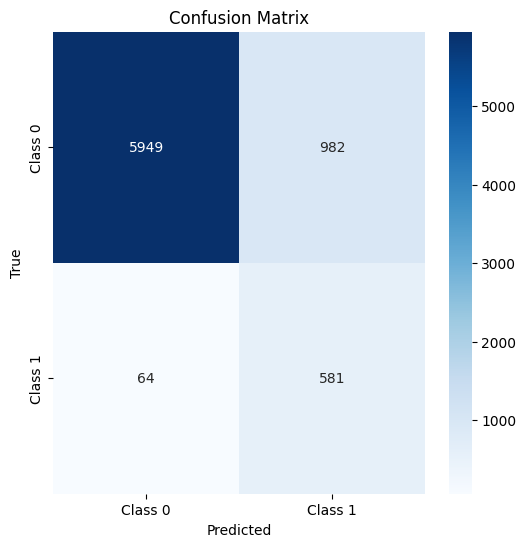

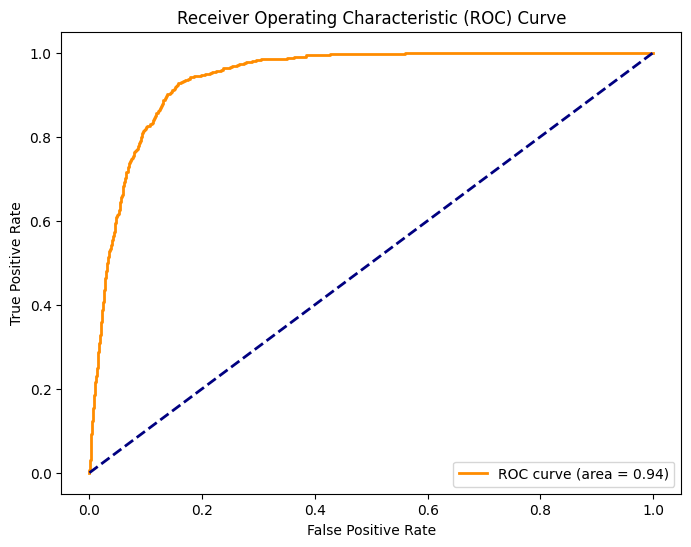


Tuned Model Accuracy: 0.8702

Tuned Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      6931
         1.0       0.38      0.86      0.53       645

    accuracy                           0.87      7576
   macro avg       0.68      0.87      0.73      7576
weighted avg       0.93      0.87      0.89      7576


Tuned Confusion Matrix:
[[6037  894]
 [  89  556]]


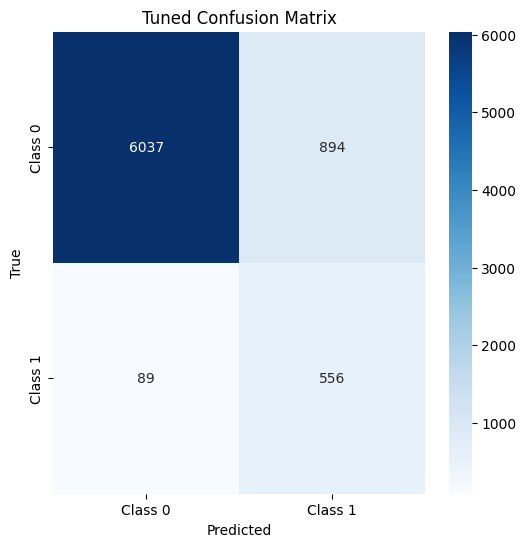

In [40]:

clf = SVC(class_weight={0: weights[0], 1: weights[1]}, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

clf_tuned = SVC(class_weight={0: weights[0], 1: weights[1]}, C=10, kernel='rbf', random_state=42)
clf_tuned.fit(X_train_scaled, y_train)

y_pred_tuned = clf_tuned.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.4f}")

print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nTuned Confusion Matrix:")
print(conf_matrix_tuned)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Tuned Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


 **SVM- Smote**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE: [27762 27762]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      6931
         1.0       0.38      0.88      0.53       645

    accuracy                           0.87      7576
   macro avg       0.69      0.87      0.73      7576
weighted avg       0.94      0.87      0.89      7576

Confusion Matrix:
 [[6017  914]
 [  78  567]]
ROC AUC Score: 0.9380290102102786


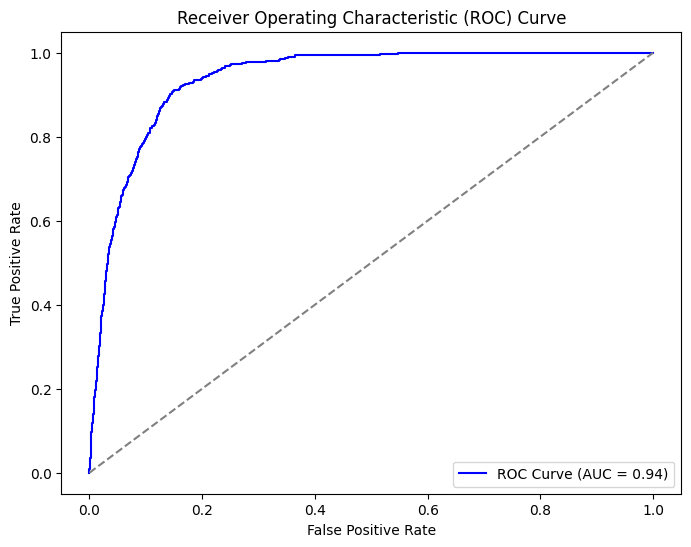

In [41]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Class distribution after SMOTE: {np.bincount(y_resampled)}")

svm_clf = SVC(kernel='rbf',class_weight="balanced", C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_resampled, y_resampled)

y_pred = svm_clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_prob = svm_clf.decision_function(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 **Svm-BaggingClassifier**

In [42]:

from sklearn.metrics import classification_report, confusion_matrix

svm_clf = SVC(kernel='rbf', class_weight='balanced', random_state=42)

ensemble_svm = BaggingClassifier(estimator=svm_clf, n_estimators=10, random_state=42)

ensemble_svm.fit(X_train_scaled, y_train)

y_pred = ensemble_svm.predict(X_test_scaled)


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[6003  928]
 [  64  581]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      6931
         1.0       0.39      0.90      0.54       645

    accuracy                           0.87      7576
   macro avg       0.69      0.88      0.73      7576
weighted avg       0.94      0.87      0.89      7576



 **SVM-RandomUnderSampler**

Orijinal sınıf dağılımı: [27762  2540]
RUS sonrası sınıf dağılımı: [2540 2540]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(



Confusion Matrix:
[[5912 1019]
 [  69  576]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      6931
         1.0       0.36      0.89      0.51       645

    accuracy                           0.86      7576
   macro avg       0.67      0.87      0.72      7576
weighted avg       0.94      0.86      0.88      7576


ROC AUC Score: 0.93


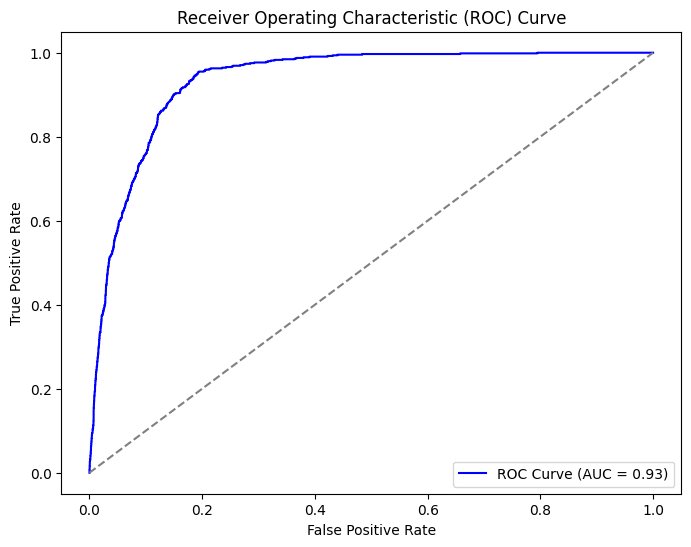

In [43]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"RUS sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

svc_clf = SVC(kernel='rbf', probability=True, random_state=42)
svc_clf.fit(X_resampled, y_resampled)

y_pred = svc_clf.predict(X_test_scaled)
y_prob = svc_clf.predict_proba(X_test_scaled)[:, 1]


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**SVM-Smoteen**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Orijinal sınıf dağılımı: [27762  2540]
SMOTE+ENN sonrası sınıf dağılımı: [23447 26758]

Confusion Matrix:
[[5893 1038]
 [  61  584]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      6931
         1.0       0.36      0.91      0.52       645

    accuracy                           0.85      7576
   macro avg       0.67      0.88      0.71      7576
weighted avg       0.94      0.85      0.88      7576


ROC AUC Score: 0.94


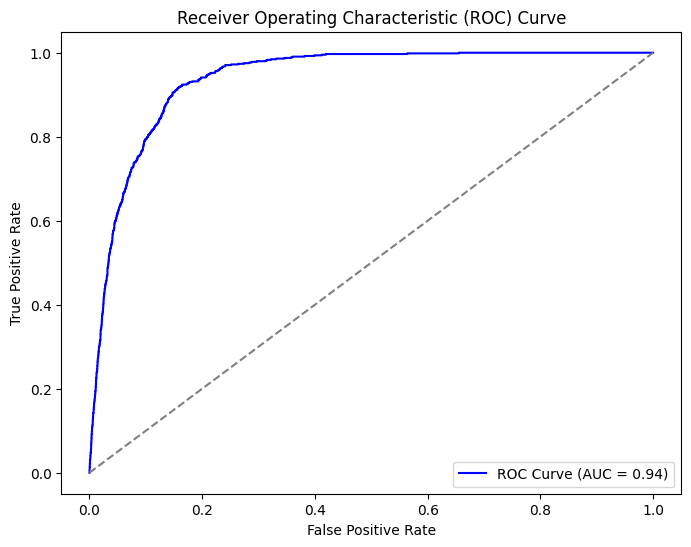

In [44]:

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTE+ENN sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

svc_clf = SVC(kernel='rbf', probability=True, random_state=42)
svc_clf.fit(X_resampled, y_resampled)

y_pred = svc_clf.predict(X_test_scaled)
y_prob = svc_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Logistic Regression-Weightclass**

Accuracy: 0.8519

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      6931
         1.0       0.35      0.85      0.50       645

    accuracy                           0.85      7576
   macro avg       0.67      0.85      0.70      7576
weighted avg       0.93      0.85      0.88      7576


Confusion Matrix:
[[5904 1027]
 [  95  550]]


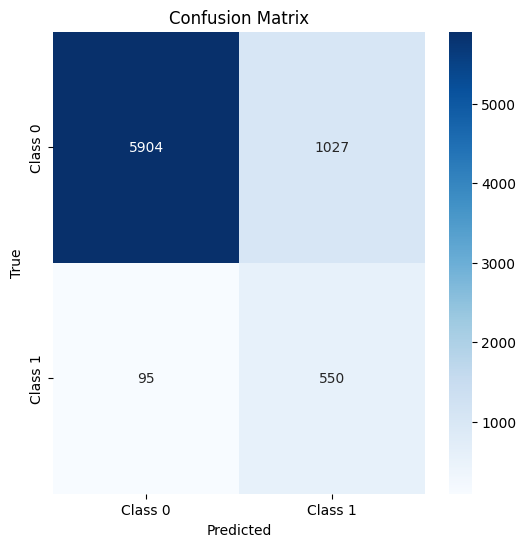

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


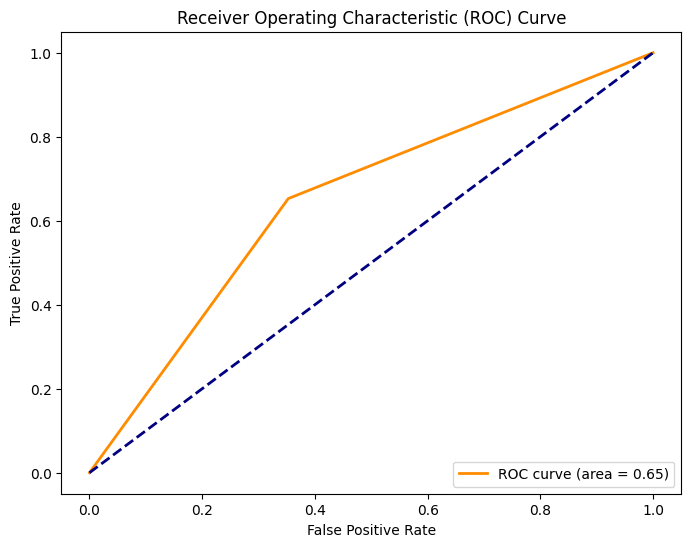


Tuned Model Accuracy: 0.8523

Tuned Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      6931
         1.0       0.35      0.86      0.50       645

    accuracy                           0.85      7576
   macro avg       0.67      0.85      0.71      7576
weighted avg       0.93      0.85      0.88      7576


Tuned Confusion Matrix:
[[5905 1026]
 [  93  552]]


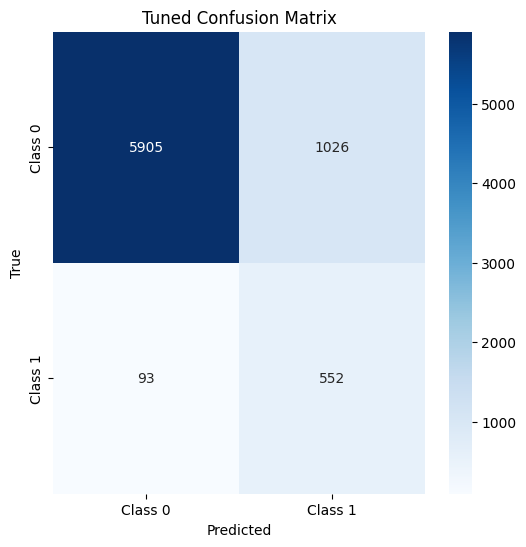

In [45]:

log_reg = LogisticRegression(class_weight={0: weights[0], 1: weights[1]}, random_state=42, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

log_reg_tuned = LogisticRegression(class_weight={0:weights[0], 1: weights[1] }, random_state=42, C=10, solver='liblinear')
log_reg_tuned.fit(X_train_scaled, y_train)

y_pred_tuned = log_reg_tuned.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.4f}")

print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nTuned Confusion Matrix:")
print(conf_matrix_tuned)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Tuned Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**Logistic Regression-Smote**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
SMOTE sonrası sınıf dağılımı: [27762 27762]

Confusion Matrix:
[[5979  952]
 [ 104  541]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      6931
         1.0       0.36      0.84      0.51       645

    accuracy                           0.86      7576
   macro avg       0.67      0.85      0.71      7576
weighted avg       0.93      0.86      0.88      7576


ROC AUC Score: 0.93


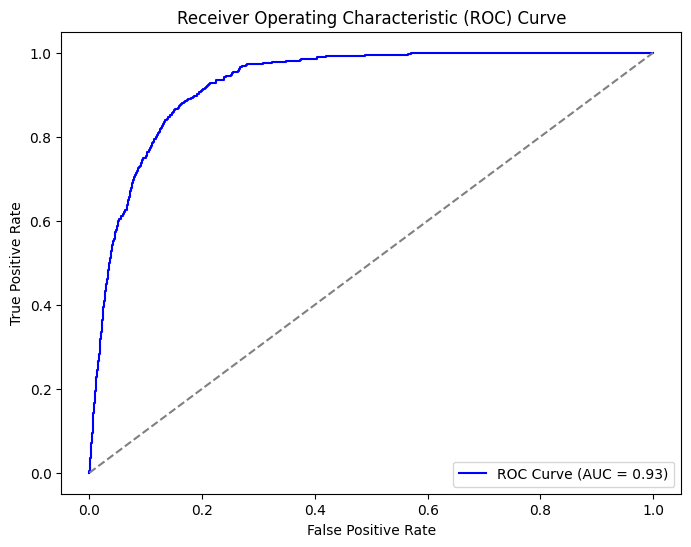

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE



smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTE sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

log_reg = LogisticRegression(class_weight="balanced",solver='liblinear', random_state=42)
log_reg.fit(X_resampled, y_resampled)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Logistic Regression-BaggingClassifier**


Confusion Matrix:
[[5796 1135]
 [  94  551]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      6931
         1.0       0.33      0.85      0.47       645

    accuracy                           0.84      7576
   macro avg       0.66      0.85      0.69      7576
weighted avg       0.93      0.84      0.87      7576


ROC AUC Score: 0.92


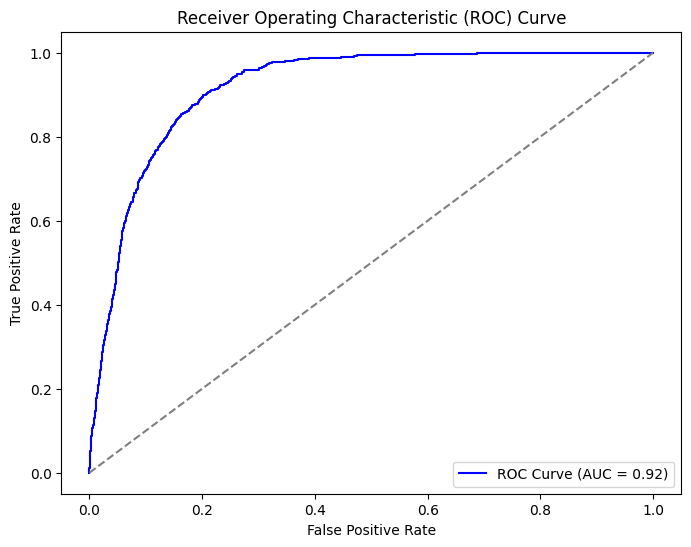

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve




base_model = LogisticRegression(class_weight={0:weights[0], 1: weights[1] },solver='liblinear', random_state=42)
ensemble_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,
    random_state=42,
    max_samples=0.8,
    max_features=0.8
)

ensemble_model.fit(X_train_scaled, y_train)

y_pred = ensemble_model.predict(X_test_scaled)
y_prob = ensemble_model.predict_proba(X_test_scaled)[:, 1]  # Pozitif sınıf için olasılıklar

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Logistic Regression-RandomUnderSampler**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
RUS sonrası sınıf dağılımı: [2540 2540]

Confusion Matrix:
[[5910 1021]
 [ 103  542]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      6931
         1.0       0.35      0.84      0.49       645

    accuracy                           0.85      7576
   macro avg       0.66      0.85      0.70      7576
weighted avg       0.93      0.85      0.88      7576


ROC AUC Score: 0.92


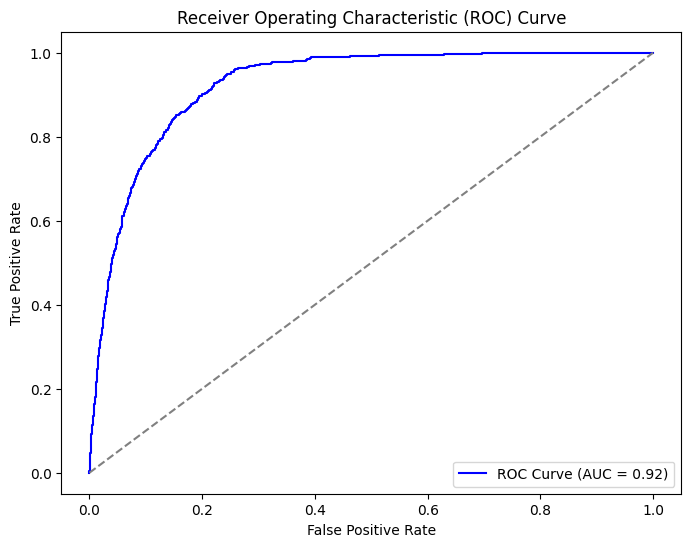

In [48]:

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"RUS sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_resampled, y_resampled)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Logistic Regression-Smoteen**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Orijinal sınıf dağılımı: [27762  2540]
SMOTEENN sonrası sınıf dağılımı: [23447 26758]

Confusion Matrix:
[[5774 1157]
 [  82  563]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      6931
         1.0       0.33      0.87      0.48       645

    accuracy                           0.84      7576
   macro avg       0.66      0.85      0.69      7576
weighted avg       0.93      0.84      0.87      7576


ROC AUC Score: 0.93


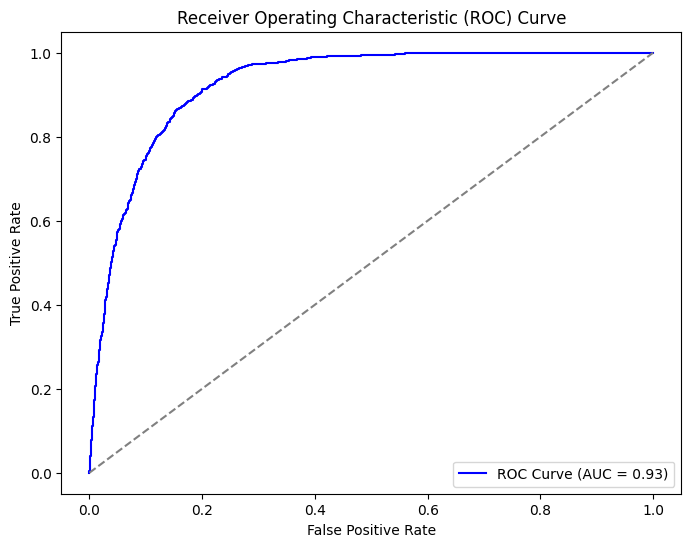

In [49]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTEENN sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_resampled, y_resampled)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Pozitif sınıf için olasılıklar

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**GradientBoost-Weight Class**

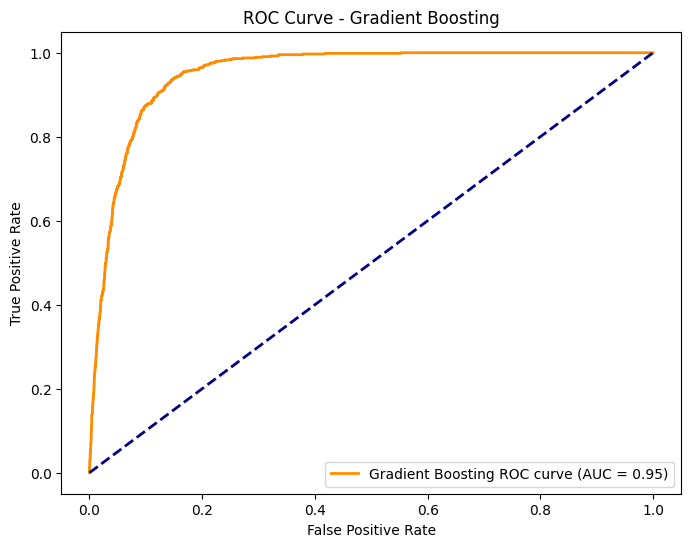


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      6931
         1.0       0.37      0.94      0.53       645

    accuracy                           0.86      7576
   macro avg       0.68      0.89      0.72      7576
weighted avg       0.94      0.86      0.88      7576



In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

sample_weights = [weights[1] if label == 1 else weights[0]  for label in y_train]

gb.fit(X_train_scaled, y_train, sample_weight=sample_weights)

y_prob_gb = gb.predict_proba(X_test_scaled)[:, 1]

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='Gradient Boosting ROC curve (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, gb.predict(X_test_scaled)))


**GradientBoost-Smote**

Orijinal sınıf dağılımı: [27762  2540]
SMOTE sonrası sınıf dağılımı: [27762 27762]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Confusion Matrix:
[[6312  619]
 [ 128  517]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      6931
         1.0       0.46      0.80      0.58       645

    accuracy                           0.90      7576
   macro avg       0.72      0.86      0.76      7576
weighted avg       0.94      0.90      0.91      7576


ROC AUC Score: 0.95


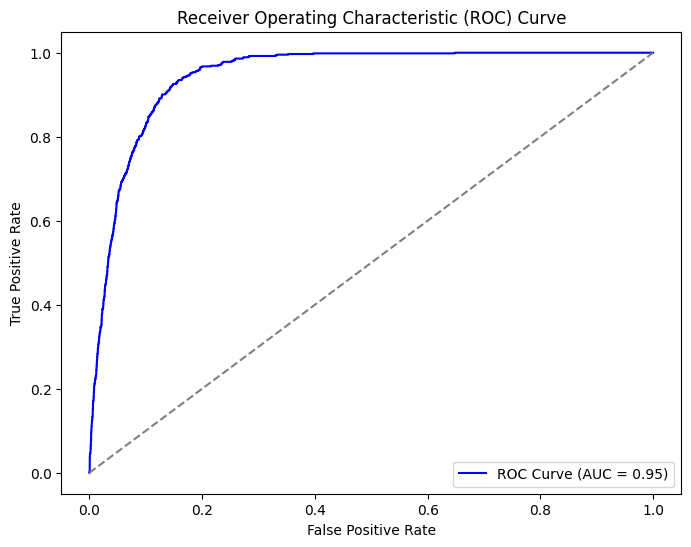

In [51]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTE sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_resampled, y_resampled)

y_pred = gb_clf.predict(X_test_scaled)
y_prob = gb_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**GradientBoost-RandomUnderSampler**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
RUS sonrası sınıf dağılımı: [2540 2540]

Confusion Matrix:
[[5885 1046]
 [  36  609]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      6931
         1.0       0.37      0.94      0.53       645

    accuracy                           0.86      7576
   macro avg       0.68      0.90      0.72      7576
weighted avg       0.94      0.86      0.88      7576


ROC AUC Score: 0.95


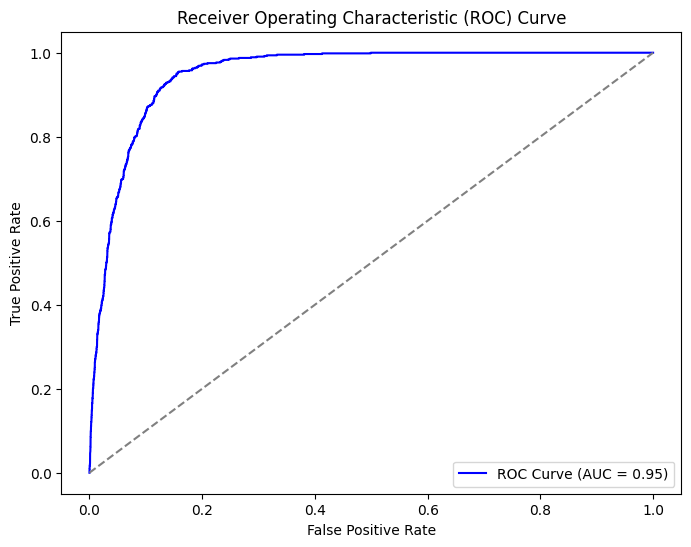

In [52]:

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"RUS sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_resampled, y_resampled)

y_pred = gb_clf.predict(X_test_scaled)
y_prob = gb_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 **GradientBoost-Smoteen**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Orijinal sınıf dağılımı: [27762  2540]
SMOTEENN sonrası sınıf dağılımı: [23447 26758]

Confusion Matrix:
[[6128  803]
 [  89  556]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      6931
         1.0       0.41      0.86      0.55       645

    accuracy                           0.88      7576
   macro avg       0.70      0.87      0.74      7576
weighted avg       0.94      0.88      0.90      7576


ROC AUC Score: 0.94


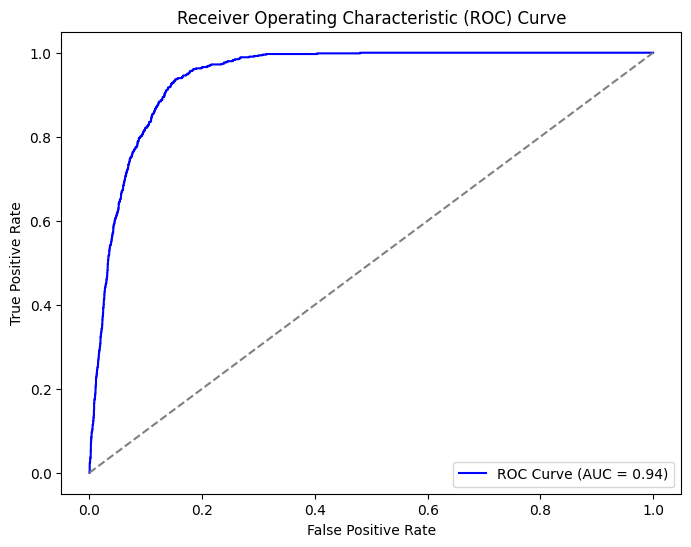

In [53]:

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTEENN sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_resampled, y_resampled)

y_pred = gb_clf.predict(X_test_scaled)
y_prob = gb_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 **CatBoost-Weight Class**

Accuracy: 0.8915

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      6931
         1.0       0.43      0.88      0.58       645

    accuracy                           0.89      7576
   macro avg       0.71      0.89      0.76      7576
weighted avg       0.94      0.89      0.91      7576


Confusion Matrix:
[[6187  744]
 [  78  567]]


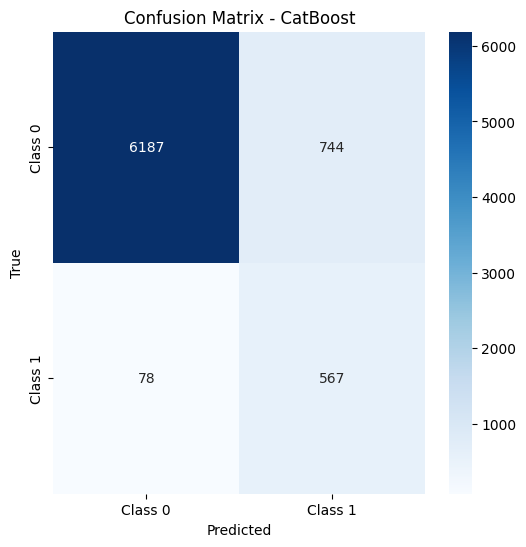

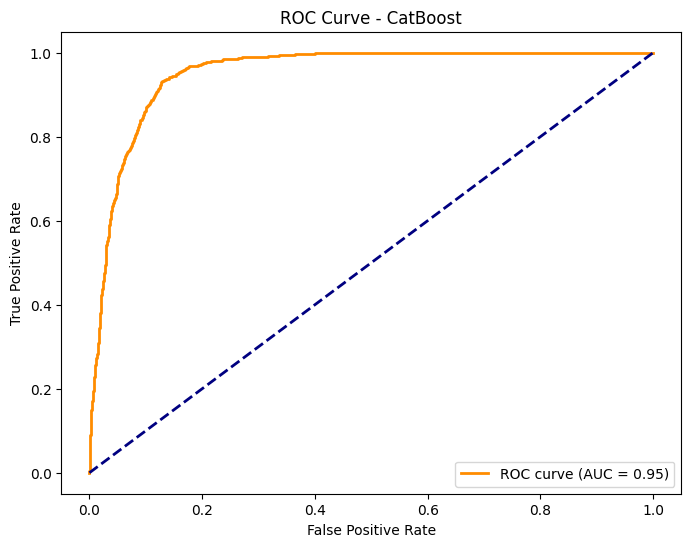

In [54]:


catboost_model = CatBoostClassifier(iterations=1000, class_weights=[weights[0],weights[1]], random_state=42, verbose=0)

catboost_model.fit(X_train_scaled, y_train)

y_pred_catboost = catboost_model.predict(X_test_scaled)

accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"Accuracy: {accuracy_catboost:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_catboost))

conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print("\nConfusion Matrix:")
print(conf_matrix_catboost)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
y_prob_catboost = catboost_model.predict_proba(X_test_scaled)[:, 1]

fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_prob_catboost)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost, tpr_catboost, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_catboost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc='lower right')
plt.show()


**CatBoost-Smote**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
SMOTE sonrası sınıf dağılımı: [27762 27762]

Confusion Matrix:
[[6716  215]
 [ 315  330]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      6931
         1.0       0.61      0.51      0.55       645

    accuracy                           0.93      7576
   macro avg       0.78      0.74      0.76      7576
weighted avg       0.93      0.93      0.93      7576


ROC AUC Score: 0.95


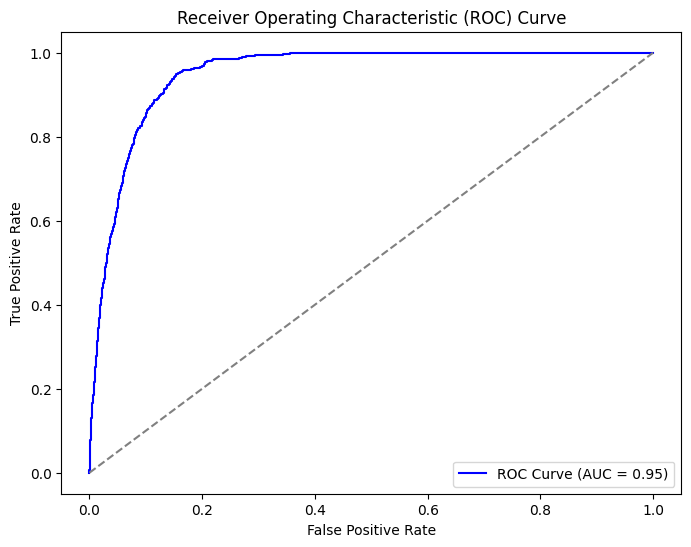

In [55]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTE sonrası sınıf dağılımı: {np.bincount(y_resampled)}")


catboost_clf = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_clf.fit(X_resampled, y_resampled)

y_pred = catboost_clf.predict(X_test_scaled)
y_prob = catboost_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 **CatBoost-RandomUnderSampler**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
RUS sonrası sınıf dağılımı: [2540 2540]

Confusion Matrix:
[[5926 1005]
 [  36  609]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      6931
         1.0       0.38      0.94      0.54       645

    accuracy                           0.86      7576
   macro avg       0.69      0.90      0.73      7576
weighted avg       0.94      0.86      0.89      7576


ROC AUC Score: 0.95


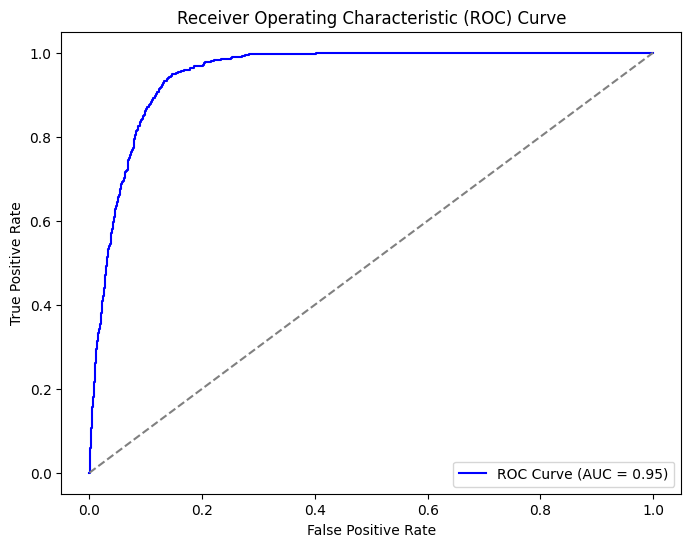

In [56]:

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"RUS sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

catboost_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)
catboost_clf.fit(X_resampled, y_resampled)

y_pred = catboost_clf.predict(X_test_scaled)
y_prob = catboost_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**CatBoost-Smoteenn**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Orijinal sınıf dağılımı: [27762  2540]
SMOTEENN sonrası sınıf dağılımı: [23447 26758]

Confusion Matrix:
[[6468  463]
 [ 174  471]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      6931
         1.0       0.50      0.73      0.60       645

    accuracy                           0.92      7576
   macro avg       0.74      0.83      0.77      7576
weighted avg       0.93      0.92      0.92      7576


ROC AUC Score: 0.95


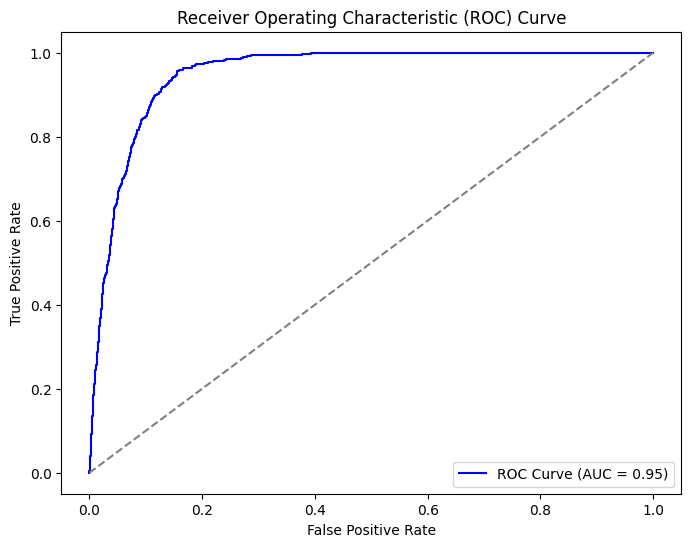

In [57]:

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTEENN sonrası sınıf dağılımı: {np.bincount(y_resampled)}")


catboost_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)
catboost_clf.fit(X_resampled, y_resampled)

y_pred = catboost_clf.predict(X_test_scaled)
y_prob = catboost_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 **XgBoost-Weight Class**


Confusion Matrix:
[[6071  860]
 [  53  592]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      6931
         1.0       0.41      0.92      0.56       645

    accuracy                           0.88      7576
   macro avg       0.70      0.90      0.75      7576
weighted avg       0.94      0.88      0.90      7576


ROC AUC Score: 0.95


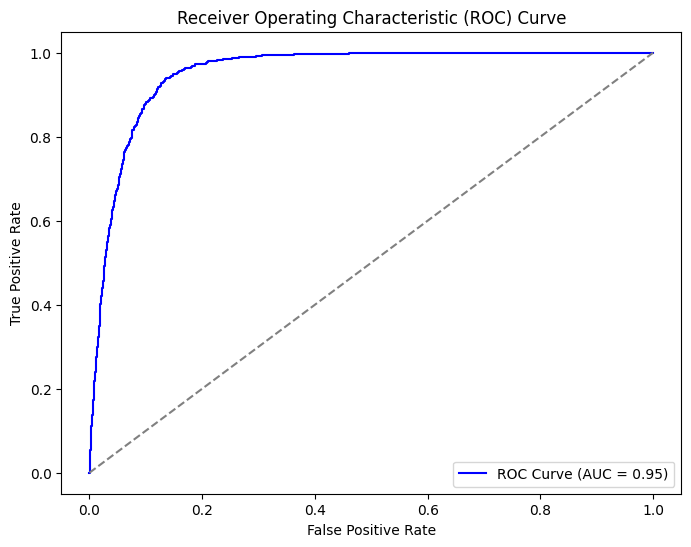

In [58]:
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

xgb_clf = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_clf.fit(X_train_scaled, y_train)

y_pred = xgb_clf.predict(X_test_scaled)
y_prob = xgb_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**XgBoost-Smote**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
SMOTE sonrası sınıf dağılımı: [27762 27762]

Confusion Matrix:
[[6541  390]
 [ 182  463]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      6931
         1.0       0.54      0.72      0.62       645

    accuracy                           0.92      7576
   macro avg       0.76      0.83      0.79      7576
weighted avg       0.94      0.92      0.93      7576


ROC AUC Score: 0.95


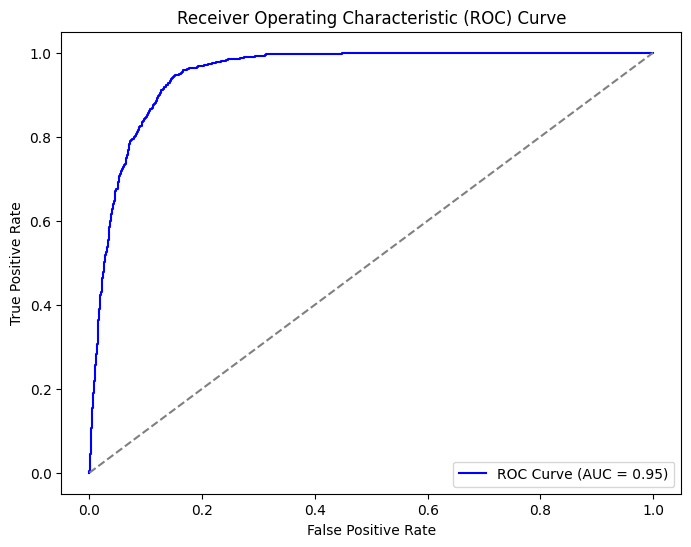

In [59]:



smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTE sonrası sınıf dağılımı: {np.bincount(y_resampled)}")


xgb_clf = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_clf.fit(X_resampled, y_resampled)

y_pred = xgb_clf.predict(X_test_scaled)
y_prob = xgb_clf.predict_proba(X_test_scaled)[:, 1]


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**XgBoost-RandomUnderSampler**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
RUS sonrası sınıf dağılımı: [2540 2540]

Confusion Matrix:
[[5922 1009]
 [  33  612]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      6931
         1.0       0.38      0.95      0.54       645

    accuracy                           0.86      7576
   macro avg       0.69      0.90      0.73      7576
weighted avg       0.94      0.86      0.89      7576


ROC AUC Score: 0.95


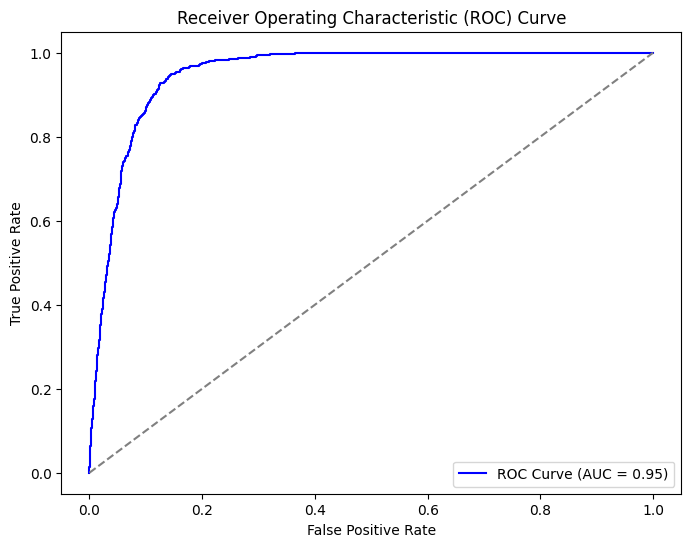

In [60]:

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"RUS sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

xgb_clf = xgb.XGBClassifier(
   random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_clf.fit(X_resampled, y_resampled)

y_pred = xgb_clf.predict(X_test_scaled)
y_prob = xgb_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**XgBoost-Smoteenn**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Orijinal sınıf dağılımı: [27762  2540]
SMOTEENN sonrası sınıf dağılımı: [23447 26758]

Confusion Matrix:
[[6332  599]
 [ 127  518]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95      6931
         1.0       0.46      0.80      0.59       645

    accuracy                           0.90      7576
   macro avg       0.72      0.86      0.77      7576
weighted avg       0.94      0.90      0.92      7576


ROC AUC Score: 0.95


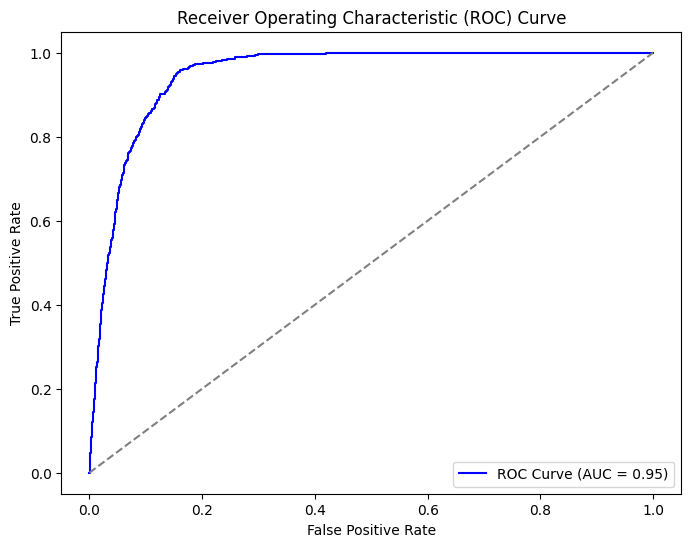

In [61]:

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTEENN sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

xgb_clf = xgb.XGBClassifier(
  random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_clf.fit(X_resampled, y_resampled)

y_pred = xgb_clf.predict(X_test_scaled)
y_prob = xgb_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 **RandomForest-Weight Class**


Confusion Matrix:
[[6816  115]
 [ 417  228]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      6931
         1.0       0.66      0.35      0.46       645

    accuracy                           0.93      7576
   macro avg       0.80      0.67      0.71      7576
weighted avg       0.92      0.93      0.92      7576


ROC AUC Score: 0.95


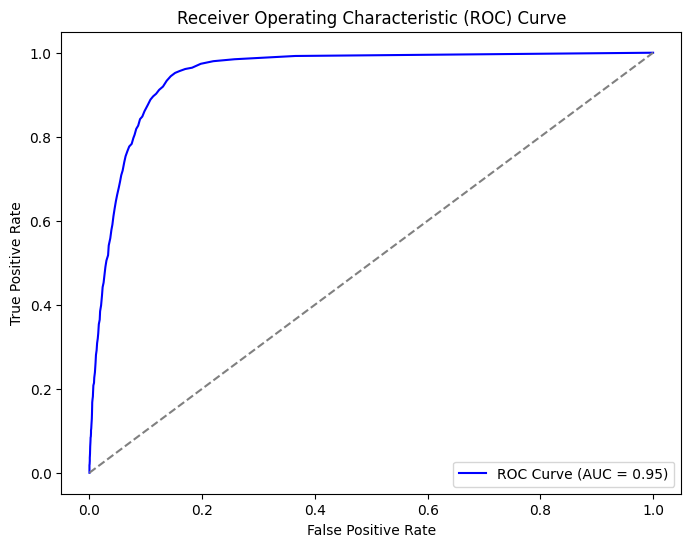

In [62]:


random_forest_clf = RandomForestClassifier(
    class_weight={0: weights[0],1: weights[1] },
    n_estimators=100,
    random_state=42
)

random_forest_clf.fit(X_train_scaled, y_train)

y_pred = random_forest_clf.predict(X_test_scaled)
y_prob = random_forest_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**RandomForest-Smote**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
SMOTE sonrası sınıf dağılımı: [27762 27762]

Confusion Matrix:
[[6578  353]
 [ 243  402]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      6931
         1.0       0.53      0.62      0.57       645

    accuracy                           0.92      7576
   macro avg       0.75      0.79      0.77      7576
weighted avg       0.93      0.92      0.92      7576


ROC AUC Score: 0.95


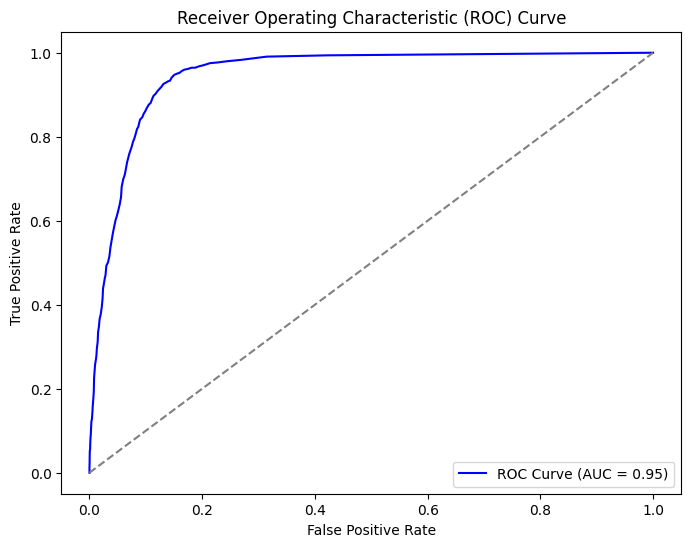

In [63]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTE sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

random_forest_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

random_forest_clf.fit(X_resampled, y_resampled)


y_pred = random_forest_clf.predict(X_test_scaled)
y_prob = random_forest_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**RandomForest-RandomUnderSampler**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
RUS sonrası sınıf dağılımı: [2540 2540]

Confusion Matrix:
[[5904 1027]
 [  42  603]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      6931
         1.0       0.37      0.93      0.53       645

    accuracy                           0.86      7576
   macro avg       0.68      0.89      0.72      7576
weighted avg       0.94      0.86      0.88      7576


ROC AUC Score: 0.95


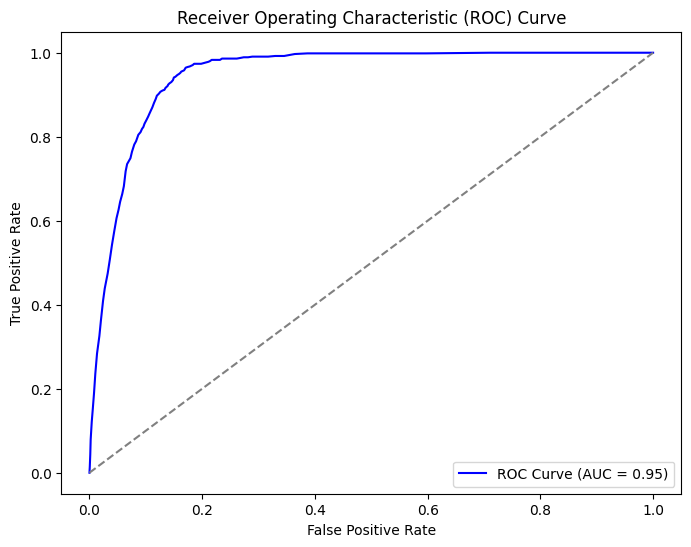

In [64]:

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"RUS sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_clf.fit(X_resampled, y_resampled)

y_pred = rf_clf.predict(X_test_scaled)
y_prob = rf_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**RandomForest-Smoteenn**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Orijinal sınıf dağılımı: [27762  2540]
SMOTEENN sonrası sınıf dağılımı: [23447 26758]

Confusion Matrix:
[[6344  587]
 [ 137  508]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      6931
         1.0       0.46      0.79      0.58       645

    accuracy                           0.90      7576
   macro avg       0.72      0.85      0.76      7576
weighted avg       0.94      0.90      0.92      7576


ROC AUC Score: 0.94


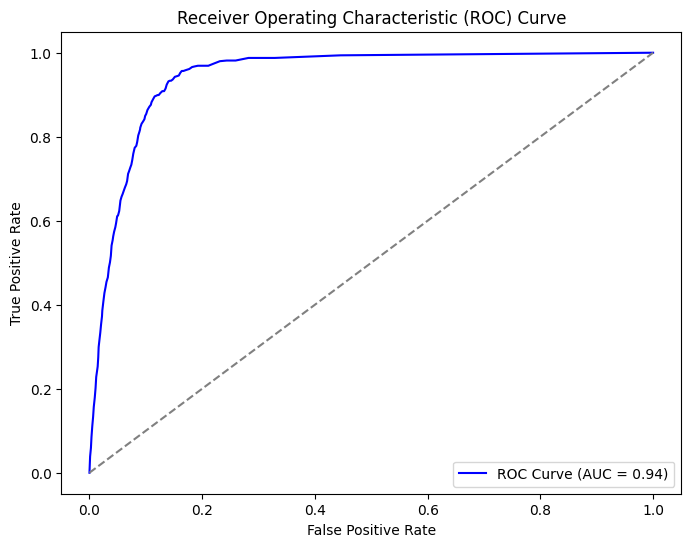

In [65]:

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"SMOTEENN sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_clf.fit(X_resampled, y_resampled)

y_pred = rf_clf.predict(X_test_scaled)
y_prob = rf_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **Best Model Feature Selection**

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,confusion_matrix,make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score

In [69]:

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"RUS sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

xgb_clf = xgb.XGBClassifier(
   random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

Best_Model=xgb_clf.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
RUS sonrası sınıf dağılımı: [2540 2540]


In [70]:
feature_importance=Best_Model.feature_importances_
gbt_fi_df=pd.DataFrame({"Feature" : X.columns, "Importance": feature_importance})
gbt_fi_df=gbt_fi_df.sort_values(by="Importance",ascending=False)
gbt_fi_df

,Feature,Importance
16,cons.conf.idx,0.191890
10,duration,0.179353
17,euribor3m*emp.var.rate*nr.employed,0.172824
12,pdays,0.081188
13,previous,0.049728
8,month,0.033124
3,education,0.031975
9,day_of_week,0.031365
15,cons.price.idx,0.028890
7,contact,0.025621


In [71]:
Selected_Features=list(gbt_fi_df[gbt_fi_df["Importance"]>0.04].Feature)

In [72]:
Selected_Features.append("y")

In [73]:
df_new=df_cleaned[Selected_Features]
df_new.head()

,cons.conf.idx,duration,euribor3m*emp.var.rate*nr.employed,pdays,previous,y
0,-36.4,261.0,27733.9557,0.0,0.0,0.0
1,-36.4,149.0,27733.9557,0.0,0.0,0.0
2,-36.4,226.0,27733.9557,0.0,0.0,0.0
3,-36.4,151.0,27733.9557,0.0,0.0,0.0
4,-36.4,307.0,27733.9557,0.0,0.0,0.0


In [74]:
X=df_new.drop("y",axis=1)
y=df_new["y"]

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [76]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Orijinal sınıf dağılımı: [27762  2540]
RUS sonrası sınıf dağılımı: [2540 2540]

Confusion Matrix:
[[5869 1062]
 [  40  605]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      6931
         1.0       0.36      0.94      0.52       645

    accuracy                           0.85      7576
   macro avg       0.68      0.89      0.72      7576
weighted avg       0.94      0.85      0.88      7576


ROC AUC Score: 0.95


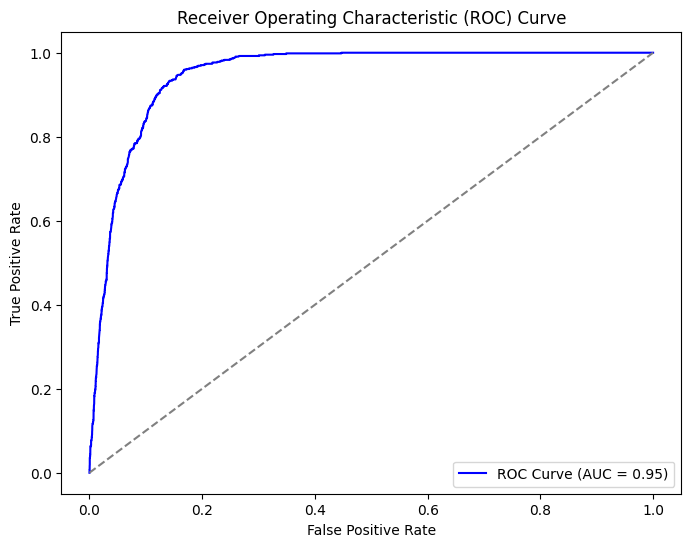

In [77]:

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

print(f"Orijinal sınıf dağılımı: {np.bincount(y_train)}")
print(f"RUS sonrası sınıf dağılımı: {np.bincount(y_resampled)}")

xgb_clf = xgb.XGBClassifier(
   random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_clf.fit(X_resampled, y_resampled)

y_pred = xgb_clf.predict(X_test_scaled)
y_prob = xgb_clf.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
